In [ ]:
# Implement conditional sampling
# Implement Gibbs Sampling for a multidim gaussian generative joint, by using the conditionals which are also gaussian distributions. 
# The minimum requirement is for joint to have D=2 variables and for Gibbs to alternate between the two.



C:\Users\koola\AppData\Local\Temp\ipykernel_13784\3170263722.py:79: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, colors='red', alpha=0.5, levels=5, label='True density')
C:\Users\koola\AppData\Local\Temp\ipykernel_13784\3170263722.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


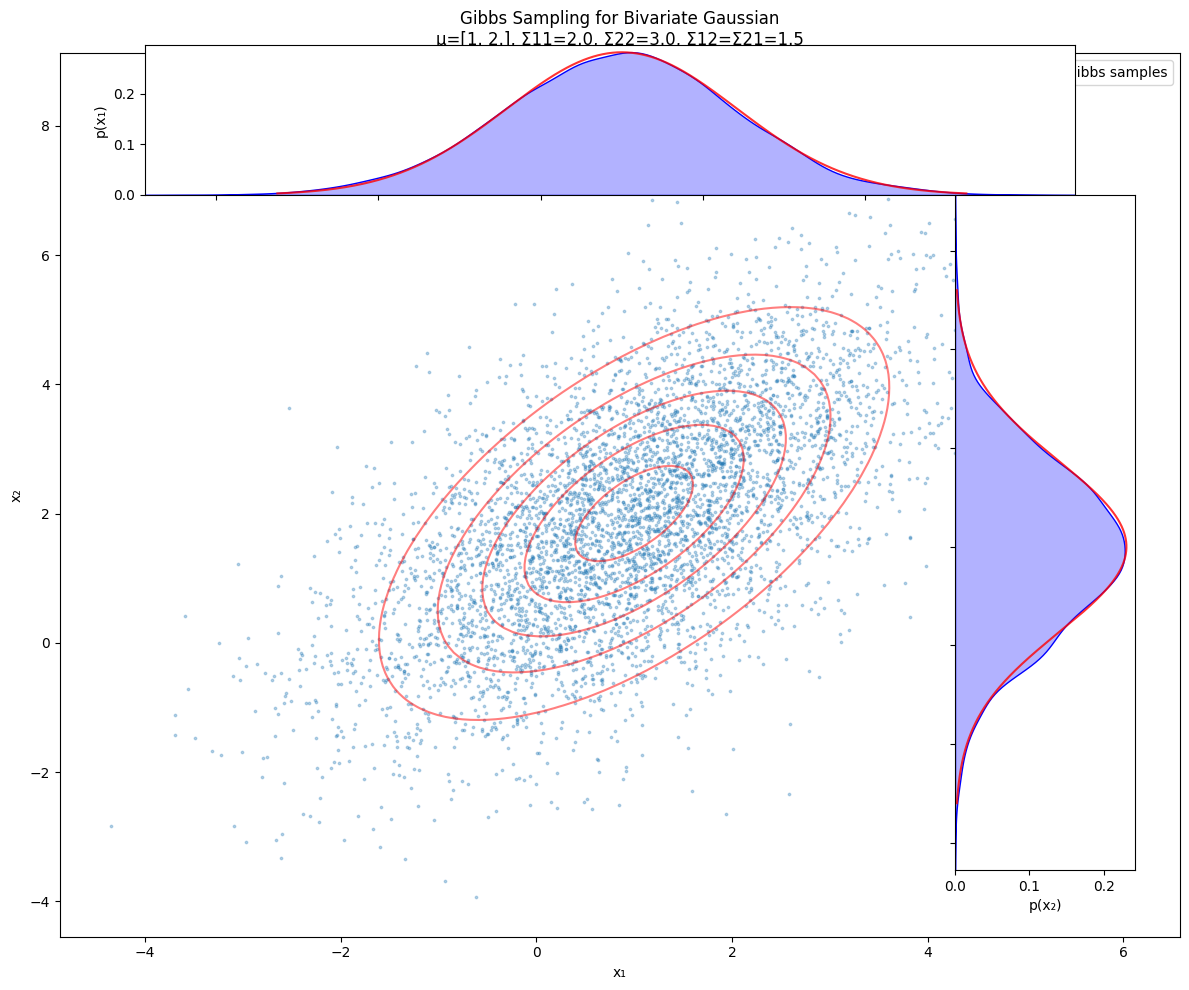

True parameters:
Mean: [1. 2.]
Covariance: 
[[2.  1.5]
 [1.5 3. ]]

Estimated parameters from Gibbs sampling:
Mean: [0.96770056 1.95185789]
Covariance: 
[[2.00980293 1.49096044]
 [1.49096044 2.95256405]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns

def gibbs_sampling_bivariate_gaussian(mu, Sigma, n_samples=5000, burn_in=1000):
    """
    Implement Gibbs sampling for a bivariate Gaussian distribution.
    
    Parameters:
    -----------
    mu : array-like, shape (2,)
        Mean vector of the bivariate Gaussian.
    Sigma : array-like, shape (2, 2)
        Covariance matrix of the bivariate Gaussian.
    n_samples : int
        Number of samples to generate.
    burn_in : int
        Number of initial samples to discard.
        
    Returns:
    --------
    samples : array, shape (n_samples, 2)
        Generated samples from the bivariate Gaussian.
    """
    # Extract components from the mean vector and covariance matrix
    mu1, mu2 = mu
    sigma11 = Sigma[0, 0]
    sigma22 = Sigma[1, 1]
    sigma12 = Sigma[0, 1]
    sigma21 = Sigma[1, 0]
    
    # Initialize samples array
    samples = np.zeros((n_samples + burn_in, 2))
    
    # Initialize starting point (can be arbitrary)
    x = np.zeros(2)
    
    # Precompute some terms for efficiency
    sigma11_inv = 1.0 / sigma11
    sigma22_inv = 1.0 / sigma22
    
    # Run Gibbs sampling
    for i in range(n_samples + burn_in):
        # Sample x1 from p(x1|x2)
        # Using formula: μ_{1|2} = μ1 + Σ12 Σ22^-1 (x2 - μ2)
        mu_1_given_2 = mu1 + sigma12 * sigma22_inv * (x[1] - mu2)
        # Using formula: Σ_{1|2} = Σ11 - Σ12 Σ22^-1 Σ21
        sigma_1_given_2 = sigma11 - sigma12 * sigma22_inv * sigma21
        x[0] = np.random.normal(mu_1_given_2, np.sqrt(sigma_1_given_2))
        
        # Sample x2 from p(x2|x1)
        # Using formula: μ_{2|1} = μ2 + Σ21 Σ11^-1 (x1 - μ1)
        mu_2_given_1 = mu2 + sigma21 * sigma11_inv * (x[0] - mu1)
        # Using formula: Σ_{2|1} = Σ22 - Σ21 Σ11^-1 Σ12
        sigma_2_given_1 = sigma22 - sigma21 * sigma11_inv * sigma12
        x[1] = np.random.normal(mu_2_given_1, np.sqrt(sigma_2_given_1))
        
        # Store the sample
        samples[i] = x
    
    # Discard burn-in samples
    return samples[burn_in:]

def plot_results(samples, mu, Sigma, title):
    """Plot the results of Gibbs sampling against the true distribution."""
    plt.figure(figsize=(12, 10))
    
    # Plot the samples
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, s=3, label='Gibbs samples')
    
    # Plot true contours
    x = np.linspace(mu[0] - 3*np.sqrt(Sigma[0, 0]), mu[0] + 3*np.sqrt(Sigma[0, 0]), 100)
    y = np.linspace(mu[1] - 3*np.sqrt(Sigma[1, 1]), mu[1] + 3*np.sqrt(Sigma[1, 1]), 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    rv = multivariate_normal(mu, Sigma)
    Z = rv.pdf(pos)
    plt.contour(X, Y, Z, colors='red', alpha=0.5, levels=5, label='True density')
    
    # Plot marginal distributions on the axes
    ax = plt.gca()
    
    # Marginal for x1
    ax_x1 = plt.axes([0.125, 0.8, 0.775, 0.15])
    sns.kdeplot(samples[:, 0], ax=ax_x1, color='blue', fill=True, alpha=0.3)
    x1_range = np.linspace(mu[0] - 3*np.sqrt(Sigma[0, 0]), mu[0] + 3*np.sqrt(Sigma[0, 0]), 1000)
    x1_pdf = multivariate_normal(mu[0], Sigma[0, 0]).pdf(x1_range)
    ax_x1.plot(x1_range, x1_pdf, 'r-', alpha=0.8)
    ax_x1.set_xticklabels([])
    ax_x1.set_ylabel('p(x₁)')
    ax_x1.set_xlim(ax.get_xlim())
    
    # Marginal for x2
    ax_x2 = plt.axes([0.8, 0.125, 0.15, 0.675])
    sns.kdeplot(y=samples[:, 1], ax=ax_x2, color='blue', fill=True, alpha=0.3)
    x2_range = np.linspace(mu[1] - 3*np.sqrt(Sigma[1, 1]), mu[1] + 3*np.sqrt(Sigma[1, 1]), 1000)
    x2_pdf = multivariate_normal(mu[1], Sigma[1, 1]).pdf(x2_range)
    ax_x2.plot(x2_pdf, x2_range, 'r-', alpha=0.8)
    ax_x2.set_yticklabels([])
    ax_x2.set_xlabel('p(x₂)')
    ax_x2.set_ylim(ax.get_ylim())
    
    plt.sca(ax)
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# def trace_plot(samples, mu, burnin_end=1000):
#     """Create trace plots to analyze convergence."""
#     plt.figure(figsize=(14, 8))
    
#     plt.subplot(2, 1, 1)
#     plt.plot(np.arange(len(samples)), samples[:, 0], 'b-', alpha=0.5)
#     plt.axhline(y=mu[0], color='r', linestyle='-')
#     plt.axvline(x=burnin_end, color='g', linestyle='--', label='Burn-in end')
#     plt.title('Trace Plot for x₁')
#     plt.ylabel('x₁')
#     plt.legend()
    
#     plt.subplot(2, 1, 2)
#     plt.plot(np.arange(len(samples)), samples[:, 1], 'b-', alpha=0.5)
#     plt.axhline(y=mu[1], color='r', linestyle='-')
#     plt.axvline(x=burnin_end, color='g', linestyle='--', label='Burn-in end')
#     plt.title('Trace Plot for x₂')
#     plt.xlabel('Iteration')
#     plt.ylabel('x₂')
#     plt.legend()
    
#     plt.tight_layout()
#     plt.show()

# Example usage
if __name__ == "__main__":
    # Define the parameters of the bivariate Gaussian
    mu = np.array([1.0, 2.0])  # Mean vector
    
    # Covariance matrix must be positive definite
    Sigma = np.array([
        [2.0, 1.5],  # Σ11, Σ12
        [1.5, 3.0]   # Σ21, Σ22
    ])
    
    # Generate samples using Gibbs sampling
    n_samples = 5000
    burn_in = 1000
    samples = gibbs_sampling_bivariate_gaussian(mu, Sigma, n_samples, burn_in)
    
    # Create a sample with burn-in included for the trace plot
    samples_with_burnin = gibbs_sampling_bivariate_gaussian(mu, Sigma, n_samples, 0)
    
    # Display the results
    plot_results(samples, mu, Sigma, 
                f"Gibbs Sampling for Bivariate Gaussian\nμ={mu}, Σ11={Sigma[0,0]}, Σ22={Sigma[1,1]}, Σ12=Σ21={Sigma[0,1]}")
    
    # Create trace plots with burn-in
    # trace_plot(samples_with_burnin, mu, burn_in)
    
    # Compute sample statistics
    sample_mean = np.mean(samples, axis=0)
    sample_cov = np.cov(samples.T)
    
    print("True parameters:")
    print(f"Mean: {mu}")
    print(f"Covariance: \n{Sigma}")
    print("\nEstimated parameters from Gibbs sampling:")
    print(f"Mean: {sample_mean}")
    print(f"Covariance: \n{sample_cov}")
